![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [115]:
# Start your code here!
import pandas as pd

w_results= pd.read_csv('women_results.csv')
w_results

m_results= pd.read_csv('men_results.csv')
m_results

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly
...,...,...,...,...,...,...,...
44348,44348,2022-12-14,Thailand,Taiwan,0,1,Friendly
44349,44349,2022-12-14,Vietnam,Philippines,1,0,Friendly
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup
44351,44351,2022-12-17,Singapore,Maldives,3,1,Friendly


In [116]:
w_results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [117]:
m_results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [118]:

# Ensure the date is in the correct format
w_results['date'] = pd.to_datetime(w_results['date'])

w_res_filtered = w_results[(w_results['tournament'] == 'FIFA World Cup') & (w_results['date'] >= '2002-01-01')]
w_res_filtered

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup


In [119]:

# Ensure the date is in the correct format
m_results['date'] = pd.to_datetime(m_results['date'])

m_res_filtered = m_results[(m_results['tournament'] == 'FIFA World Cup') & (m_results['date'] >= '2002-01-01')]
m_res_filtered

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


In [120]:
# Add the total_score column to the women's results dataset
w_res_filtered['total_score'] = w_res_filtered['home_score'] + w_res_filtered['away_score']

# Add the total_score column to the men's results dataset
m_res_filtered['total_score'] = m_res_filtered['home_score'] + m_res_filtered['away_score']

# Display the updated datasets
w_res_filtered, m_res_filtered

(      Unnamed: 0       date  ...      tournament total_score
 1600        1600 2003-09-20  ...  FIFA World Cup           3
 1601        1601 2003-09-20  ...  FIFA World Cup           2
 1602        1602 2003-09-20  ...  FIFA World Cup           5
 1603        1603 2003-09-20  ...  FIFA World Cup           6
 1604        1604 2003-09-21  ...  FIFA World Cup           4
 ...          ...        ...  ...             ...         ...
 4465        4465 2019-06-29  ...  FIFA World Cup           3
 4466        4466 2019-07-02  ...  FIFA World Cup           3
 4467        4467 2019-07-03  ...  FIFA World Cup           1
 4468        4468 2019-07-06  ...  FIFA World Cup           3
 4469        4469 2019-07-07  ...  FIFA World Cup           2
 
 [200 rows x 8 columns],
        Unnamed: 0       date  ...      tournament total_score
 25164       25164 2002-05-31  ...  FIFA World Cup           1
 25165       25165 2002-06-01  ...  FIFA World Cup           8
 25166       25166 2002-06-01  ...  FIFA

Shapiro-Wilk Test for Women FIFA World Cup - total_score: Statistics=0.8491013050079346, p=3.8905201759850683e-13


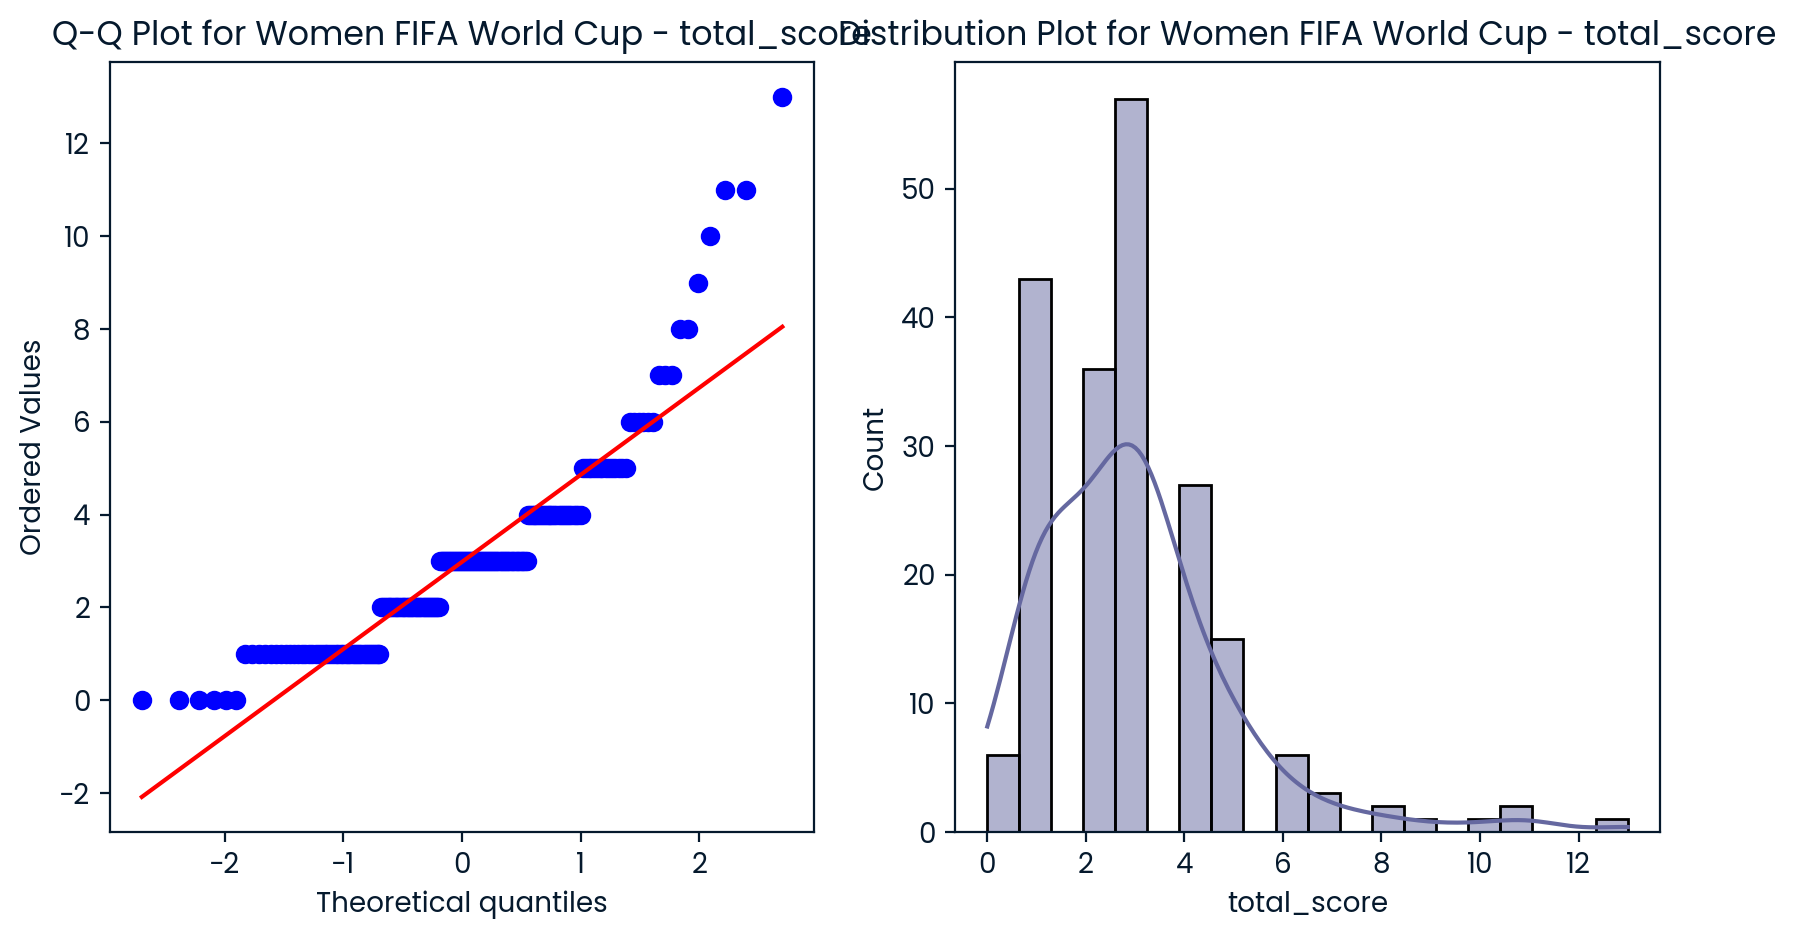

Shapiro-Wilk Test for Men FIFA World Cup - total_score: Statistics=0.9266489744186401, p=8.894154401688226e-13


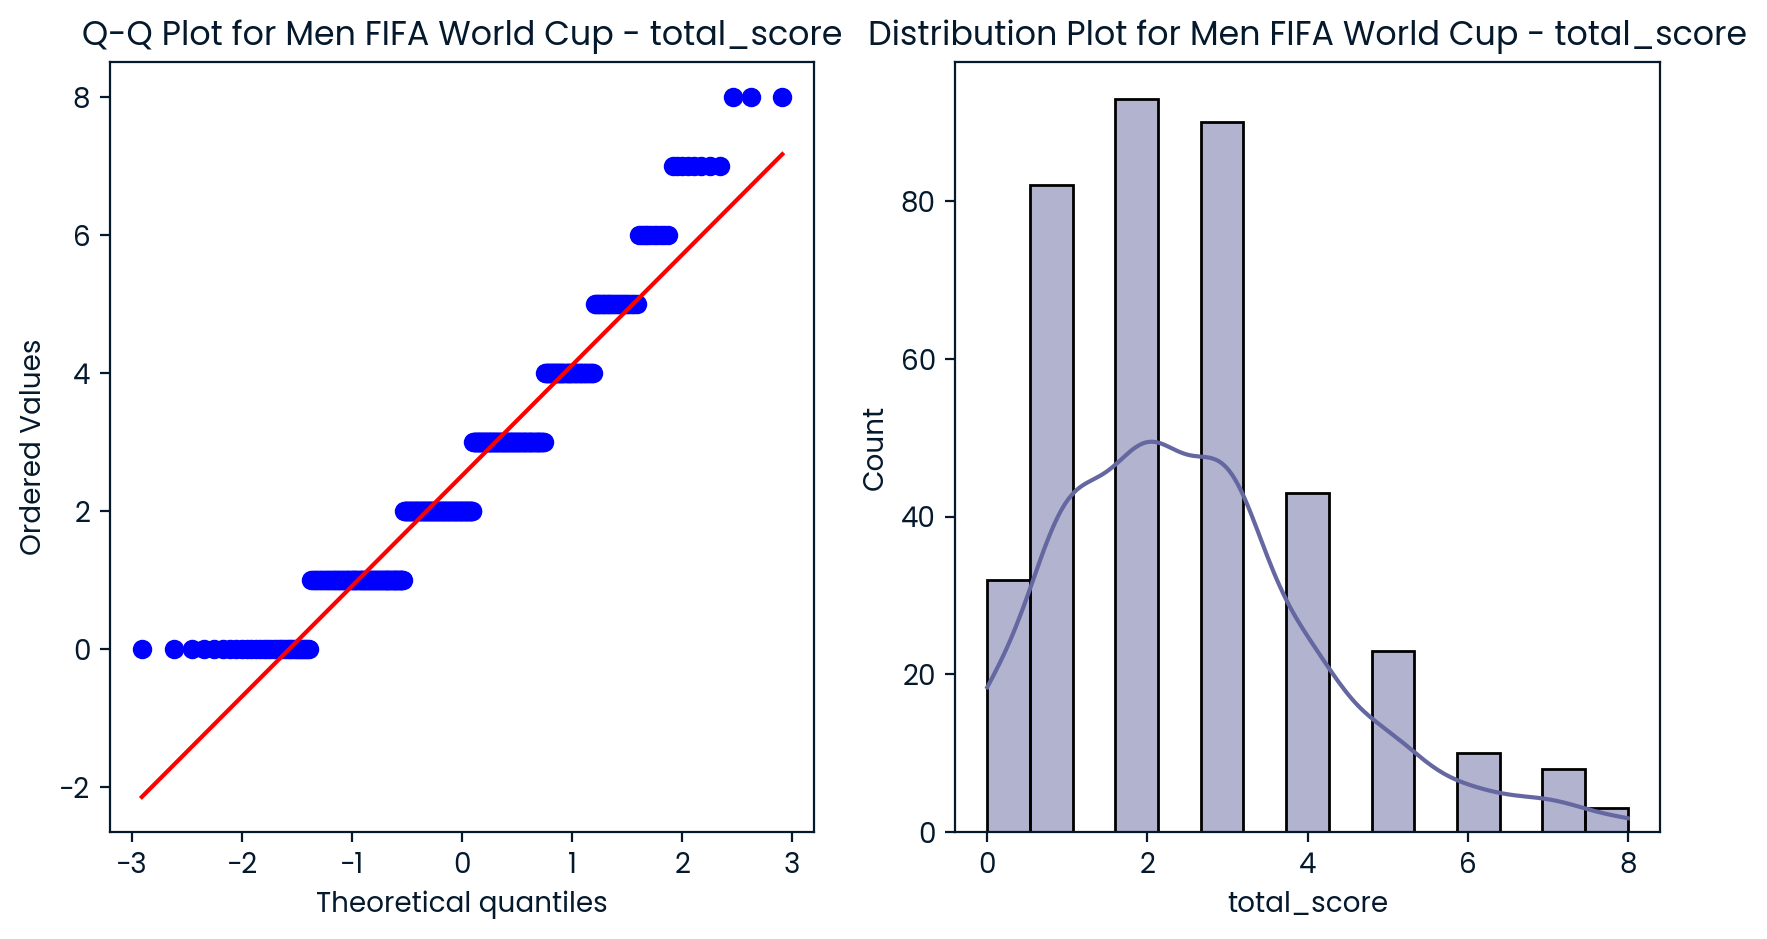

In [121]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Function to check normality
def check_normality(data, column, title):
    if column not in data.columns:
        raise KeyError(f"Column '{column}' not found in the dataset.")
    
    # Shapiro-Wilk Test
    stat, p = stats.shapiro(data[column])
    print(f'Shapiro-Wilk Test for {title} - {column}: Statistics={stat}, p={p}')
    
    # Q-Q Plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {title} - {column}')
    
    # Distribution Plot
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution Plot for {title} - {column}')
    plt.show()

# Check normality for women's dataset
# Ensure w_res_filtered is defined and contains the 'total_score' column
if 'w_res_filtered' in globals() and 'total_score' in w_res_filtered.columns:
    check_normality(w_res_filtered, 'total_score', 'Women FIFA World Cup')
else:
    print("w_res_filtered is not defined or does not contain the 'total_score' column.")

# Check normality for men's dataset
# Ensure m_res_filtered is defined and contains the 'total_score' column
if 'm_res_filtered' in globals() and 'total_score' in m_res_filtered.columns:
    check_normality(m_res_filtered, 'total_score', 'Men FIFA World Cup')
else:
    print("m_res_filtered is not defined or does not contain the 'total_score' column.")

In [122]:
import pandas as pd
import pingouin as pg

# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([w_res_filtered, m_res_filtered], axis=0, ignore_index=True)

# Ensure the 'group' column exists in both dataframes before concatenation
w_res_filtered['group'] = 'women'
m_res_filtered['group'] = 'men'

# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([w_res_filtered, m_res_filtered], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["total_score", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="total_score")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pg.mwu(x=both_subset_wide["women"],
                    y=both_subset_wide["men"],
                    alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}